# Autorzy

- Mateusz Łopaciński
- Mateusz Mazur

# Przygotowanie danych

## Wczytanie danych

W pierwszej kolejności wczytamy dane ze zbiorów danych, na których będziemy pracować.

In [121]:
import pandas as pd

column_names = ['x', 'y', 'class']

flame_df = pd.read_csv('data/flame.txt', sep='\t', header=None, names=column_names)
jain_df = pd.read_csv('data/jain.txt', sep='\t', header=None, names=column_names)

Zobaczmy, czy dane zostały prawidłowo wczytane (czy zgadzają się typy danych)

In [122]:
flame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       240 non-null    float64
 1   y       240 non-null    float64
 2   class   240 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


In [123]:
jain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       373 non-null    float64
 1   y       373 non-null    float64
 2   class   373 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.9 KB


Sprawdźmy również kilka początkowych wartości z obu zbiorów

In [124]:
flame_df.head()

x      y  class
0  1.85  27.80      1
1  1.35  26.65      1
2  1.40  23.25      2
3  0.85  23.05      2
4  0.50  22.35      2

In [125]:
jain_df.head()

x      y  class
0  0.85  17.45      2
1  0.75  15.60      2
2  3.30  15.45      2
3  5.25  14.20      2
4  4.90  15.65      2

## Podział na zbiorów danych na zbiory cech i klasy

In [126]:
X_flame, y_flame = flame_df.values[:, :2], flame_df.values[:, 2]
X_jain, y_jain = jain_df.values[:, :2], jain_df.values[:, 2]

# SVM

## Pomocnicze funkcje

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import pairwise_kernels

import numpy as np

def plot_svm(svm, X, y, ax=plt, h=.02):
    h = .02  # mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # create a meshgrid to plot a contour plot of the decision boundary
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # predict the class of each point in the meshgrid
    svm.fit(X, y)
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # create a contour plot of the decision boundary
    ax.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

    # create a scatter plot of the data points
    scatter = ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=plt.cm.Dark2,
        s=30,
        edgecolors='k',
        linewidth=0.5
    )
    
    # plot the support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='black')

    # calculate margins for linear kernel
    if svm.kernel == 'linear':
        w = svm.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(x_min, x_max)
        yy = a * xx - (svm.intercept_[0]) / w[1]
        margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
        yy_down = yy - np.abs(a) * margin
        yy_up = yy + np.abs(a) * margin

        ax.plot(xx, yy, 'k-')
        ax.plot(xx, yy_down, 'k--')
        ax.plot(xx, yy_up, 'k--')
        ax.fill_between(xx, yy_down, yy_up, edgecolor='none', alpha=0.2)

    # add the legend and axis labels
    classes = np.unique(y)
    labels = ['Class {}'.format(int(c)) for c in classes]
    ax.legend(handles=scatter.legend_elements()[0], labels=labels, loc='best', fontsize=15)

    if ax == plt:
        plt.xlabel('x', fontsize=15)
        plt.ylabel('y', fontsize=15)
    else:
        ax.set_xlabel('x', fontsize=15)
        ax.set_ylabel('y', fontsize=15)
    
def train_svm(X, y, kernel, C=1, gamma='scale', test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return svm, acc

## Liniowy SVM

### Wstępne obserwacje

Narysujmy wykresy dla domyślnych parametrów klasyfikatora SVM

In [128]:
def linear_svm(X, y, C=1, gamma='scale'):
    svm, acc = train_svm(X, y, 'linear', C, gamma)
    print('Linear SVM accuracy: {:.2f}%'.format(acc * 100))
    plt.figure(figsize=(10, 10))
    plt.title(f'{svm.kernel} SVM (C={svm.C}, gamma={svm.gamma})', size=20)
    plot_svm(svm, X, y)

#### Flame

Linear SVM accuracy: 85.42%


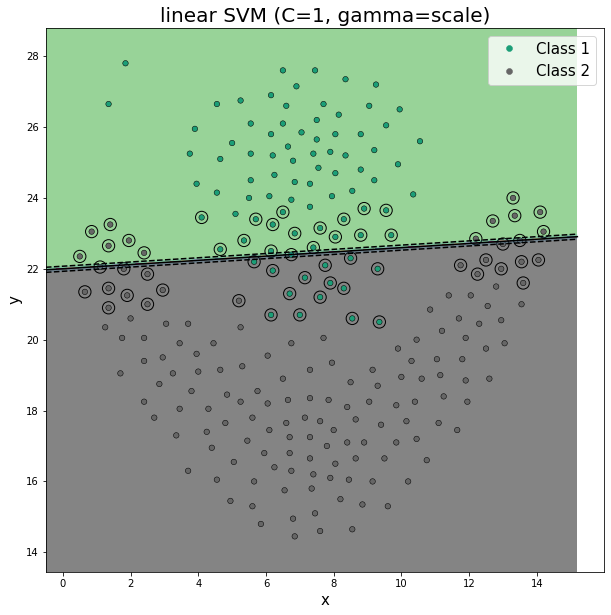

In [129]:
linear_svm(X_flame, y_flame)

#### Jain

Linear SVM accuracy: 97.33%


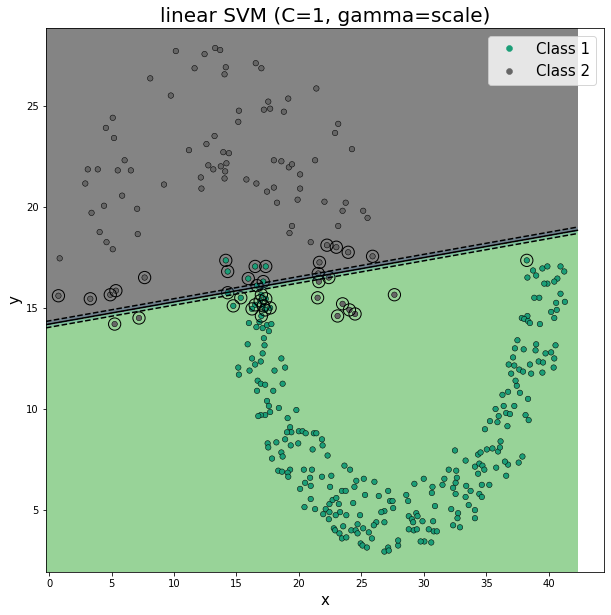

In [130]:
linear_svm(X_jain, y_jain)

### Analiza dla różnych wartości parametrów

# TODO - dodaj opis, dlaczego zmieniają się te parametry

```
Chat GPT:
Aby osiągnąć niskie kary dla różnych wartości gamma, należy wybrać wartości C bliskie zero lub bardzo małe wartości. Takie wartości C zmniejszą w szczególności wagę kary, co pozwoli na mniej rygorystyczne uregulowanie danych i mniejsze kary.

Natomiast, aby skupić się na próbkach po właściwej stronie, najlepiej wybrać wartości gamma bliskie 1, co pozwoli na zwiększenie wpływu oddalenia próbek od hiperpłaszczyzny.

Wartości skrajne można wypróbować na całym spektrum C i gamma, nie wykluczając bardzo dużych wartości C lub bardzo małych wartości gamma, aby zbadać ich wpływ na wynik. Jednak warto zwrócić uwagę na to, że większość algorytmów SVM działa szybciej i dokładniej dla mniejszych wartości C, a dla bardzo dużych wartości C działanie algorytmu może być nieefektywne w przypadku niezbalansowanego zbioru danych, z dużą liczbą próbek po jednej stronie hiperpłaszczyzny.

Ostatecznie wybór wartości C i gamma zależy również od charakterystyki zbioru danych, w tym liczby próbek, liczby funkcji i stopnia skomplikowania dzieki czemu warto przetestować różne wartości tych parametrów na zbiorze danych i dobrać najlepsze wartosci C i gamma, które dadzą najlepsze wyniki.
```

In [131]:
def compare_linear_svm(X, y, C, gamma):
  fig, axs = plt.subplots(len(C), len(gamma), figsize=(30, 30))

  for i, c in enumerate(C):
    for j, g in enumerate(gamma):
      svm, acc = train_svm(X, y, 'linear', c, g)
      print(f'C={c}, gamma={g}, accuracy={acc:.4f}')
      ax = axs[i, j]
      ax.set_title(f'{svm.kernel} SVM (C={svm.C}, gamma={svm.gamma})', fontsize=15)
      plot_svm(svm, X, y, ax=ax)

#### Flame

C=0.001, gamma=0.001, accuracy=0.8125
C=0.001, gamma=0.01, accuracy=0.8750
C=0.001, gamma=1, accuracy=0.8750
C=0.001, gamma=100, accuracy=0.8750
C=0.001, gamma=10000, accuracy=0.9167
C=0.01, gamma=0.001, accuracy=0.8958
C=0.01, gamma=0.01, accuracy=0.9167
C=0.01, gamma=1, accuracy=0.8542
C=0.01, gamma=100, accuracy=0.8333
C=0.01, gamma=10000, accuracy=0.8958
C=1, gamma=0.001, accuracy=0.8542
C=1, gamma=0.01, accuracy=0.9167
C=1, gamma=1, accuracy=0.8750
C=1, gamma=100, accuracy=0.8958
C=1, gamma=10000, accuracy=0.8542
C=100, gamma=0.001, accuracy=0.8958
C=100, gamma=0.01, accuracy=0.8958
C=100, gamma=1, accuracy=0.9375
C=100, gamma=100, accuracy=0.8125
C=100, gamma=10000, accuracy=0.8750
C=10000, gamma=0.001, accuracy=0.8333
C=10000, gamma=0.01, accuracy=0.8542
C=10000, gamma=1, accuracy=0.9375
C=10000, gamma=100, accuracy=0.8125
C=10000, gamma=10000, accuracy=0.8958


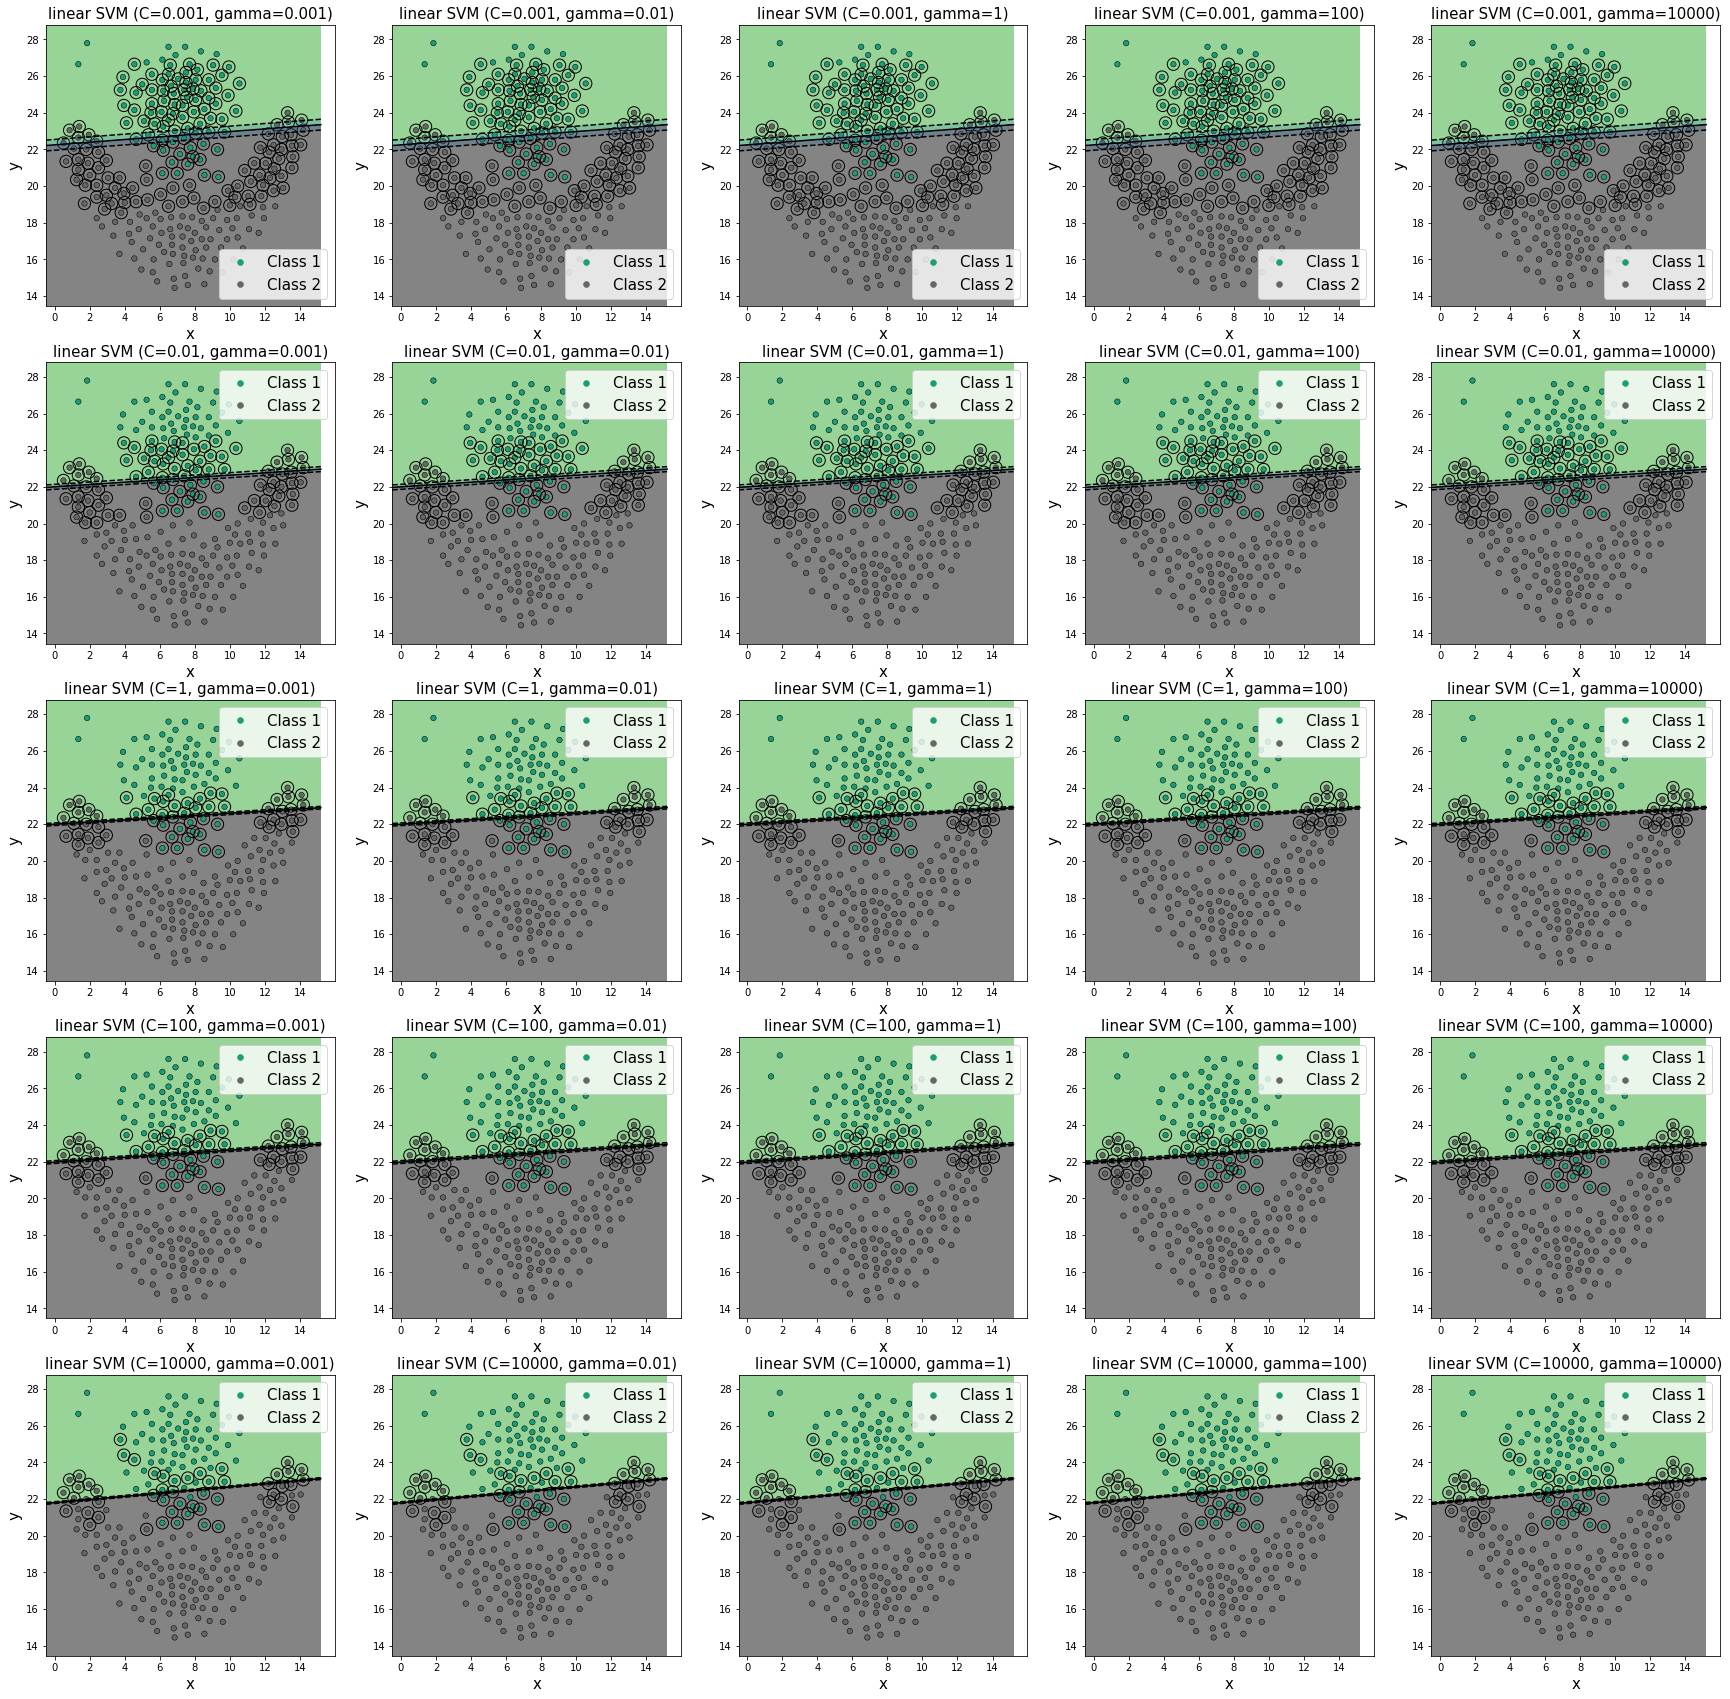

In [132]:
C = [0.001, 0.01, 1, 100, 10000]
gamma = [0.001, 0.01, 1, 100, 10000]

compare_linear_svm(X_flame, y_flame, C, gamma)

#### Jain

C=0.001, gamma=0.001, accuracy=0.9467
C=0.001, gamma=0.01, accuracy=0.9733
C=0.001, gamma=1, accuracy=0.9467
C=0.001, gamma=100, accuracy=0.9733
C=0.001, gamma=10000, accuracy=0.9200
C=0.01, gamma=0.001, accuracy=0.9333
C=0.01, gamma=0.01, accuracy=0.9600
C=0.01, gamma=1, accuracy=0.9333
C=0.01, gamma=100, accuracy=0.9333
C=0.01, gamma=10000, accuracy=0.9600
C=1, gamma=0.001, accuracy=0.9200
C=1, gamma=0.01, accuracy=0.9467
C=1, gamma=1, accuracy=0.9333
C=1, gamma=100, accuracy=0.9467
C=1, gamma=10000, accuracy=0.9733
C=100, gamma=0.001, accuracy=0.9867
C=100, gamma=0.01, accuracy=0.9600
C=100, gamma=1, accuracy=0.9600
C=100, gamma=100, accuracy=0.9467
C=100, gamma=10000, accuracy=0.9467
C=10000, gamma=0.001, accuracy=0.9600
C=10000, gamma=0.01, accuracy=0.9733
C=10000, gamma=1, accuracy=0.9467
C=10000, gamma=100, accuracy=0.9733
C=10000, gamma=10000, accuracy=0.9333


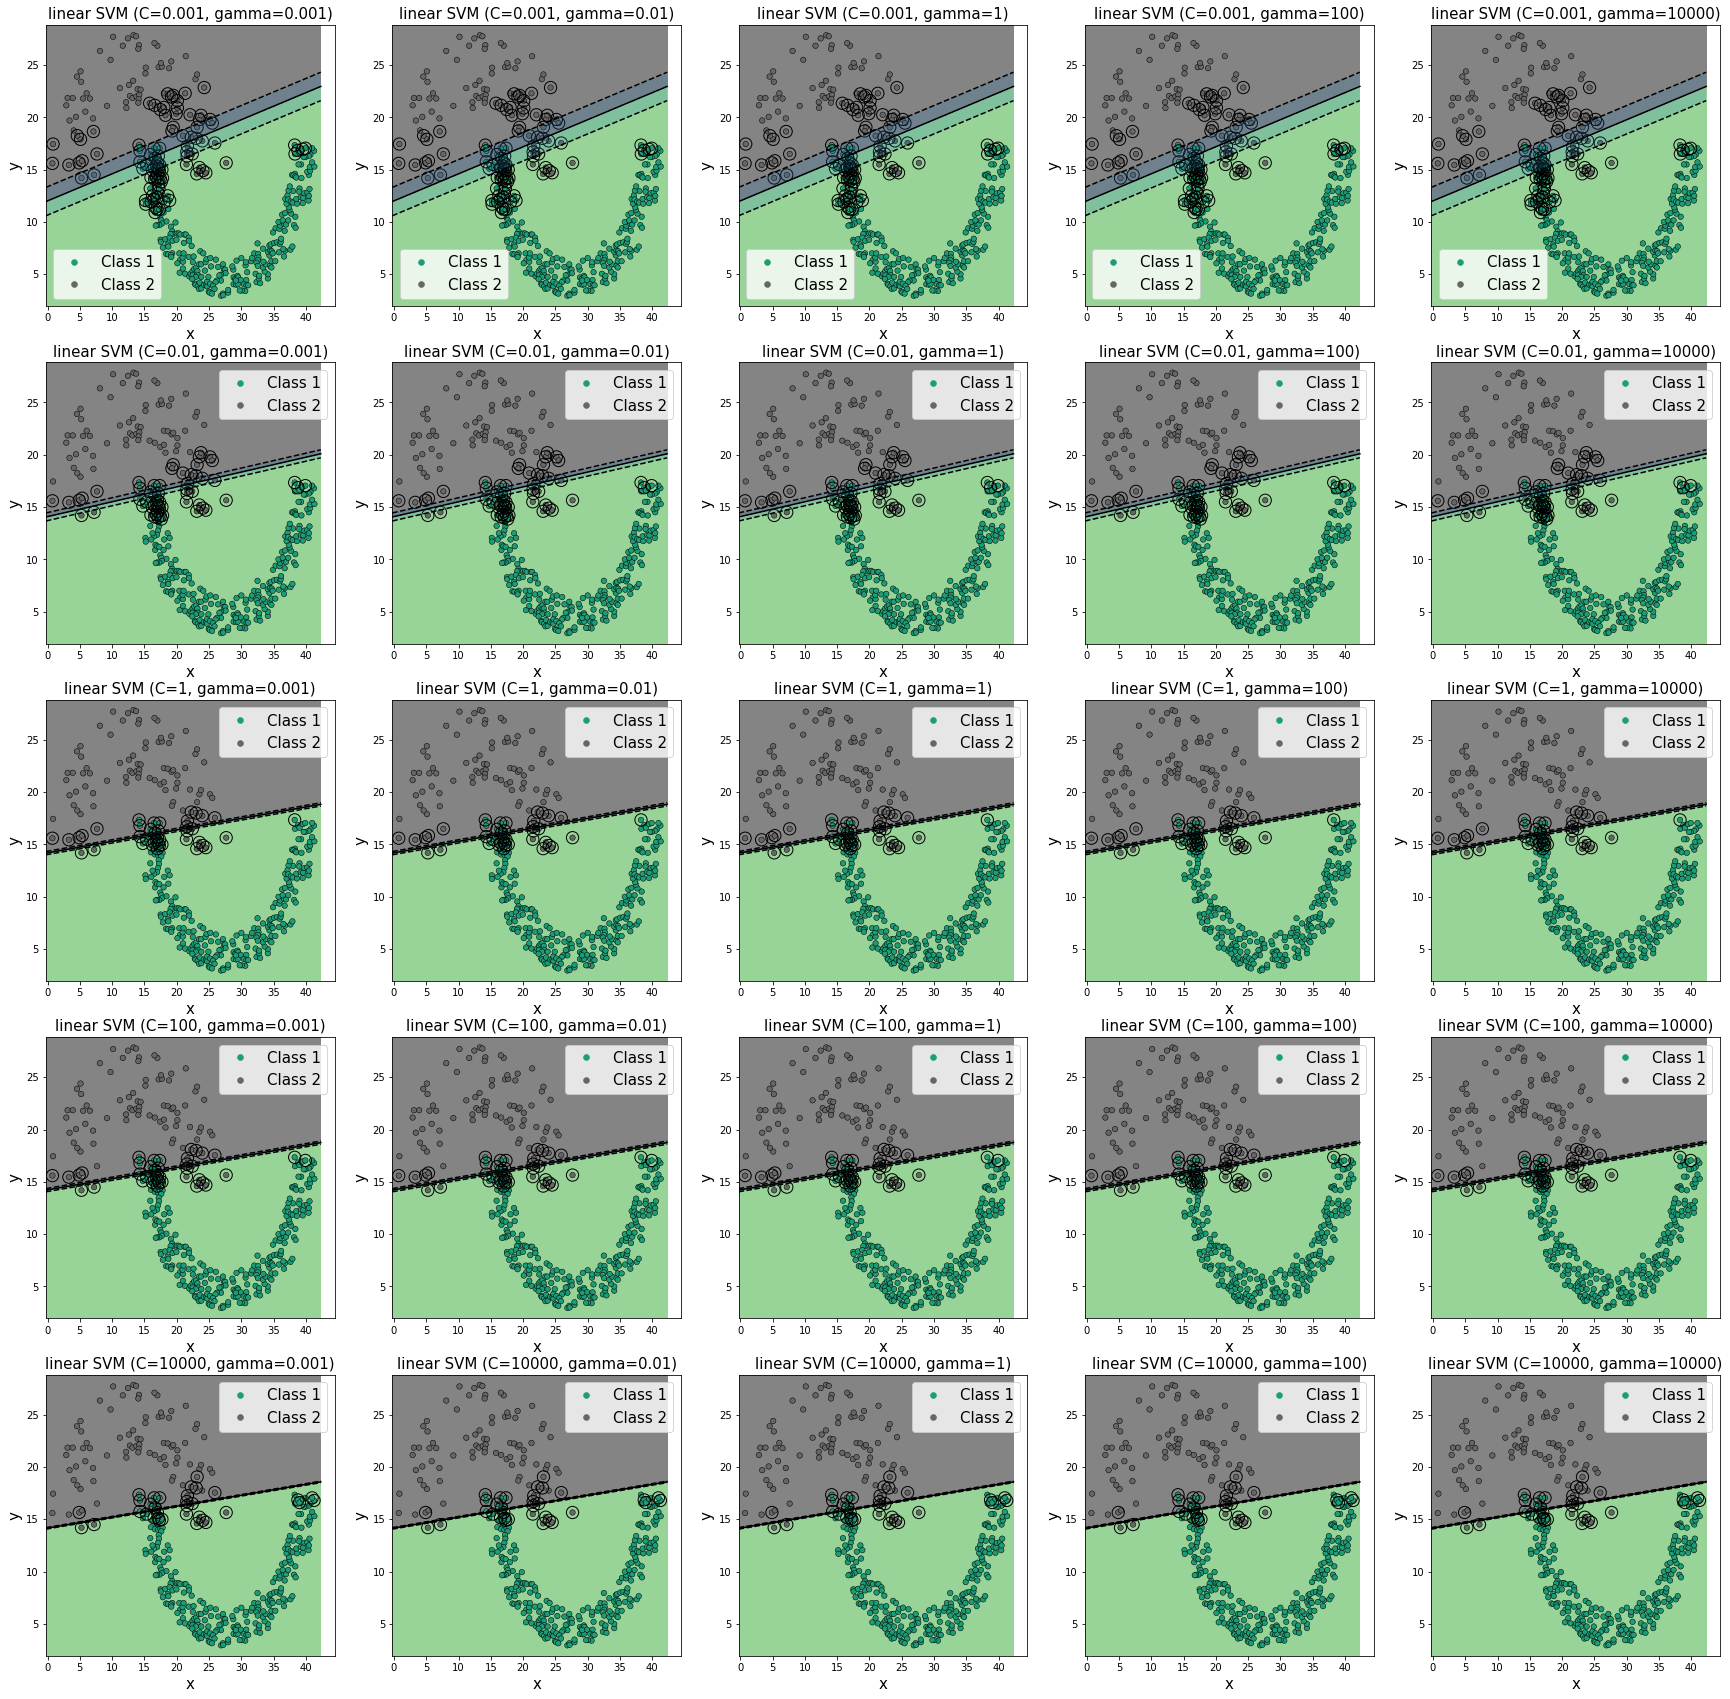

In [133]:
C = [0.001, 0.01, 1, 100, 10000]
gamma = [0.001, 0.01, 1, 100, 10000]

compare_linear_svm(X_jain, y_jain, C, gamma)

## Kernel SVM
# TODO - fix this

### a) Kernel typu niepełny naturalny iloczny skalarny, tj. iloczyn pierwszej składowej obu wektorów, pomijający drugą składową
$$
K(x, y) = x_1y_1
$$

#### Definicja kernela

In [134]:
def scalar_kernel(x, y):
    n_samples_X, n_features_X = x.shape
    n_samples_Y, n_features_Y = y.shape
    K = np.zeros((n_samples_X, n_samples_Y))
    
    for i in range(n_samples_X):
        for j in range(n_samples_Y):
            K[i, j] = x[i, 0] * y[j, 0]
    return K

#### Obserwacje

In [135]:
def scalar_svm(X, y):
    svm, acc = train_svm(X, y, scalar_kernel)
    print(f'accuracy={acc * 100:.2f}')
    plt.figure(figsize=(10, 10))
    plt.title(f'scalar SVM', fontsize=20)
    plot_svm(svm, X, y, h=1)

##### Flame

accuracy=56.25


IndexError: index 0 is out of bounds for axis 1 with size 0

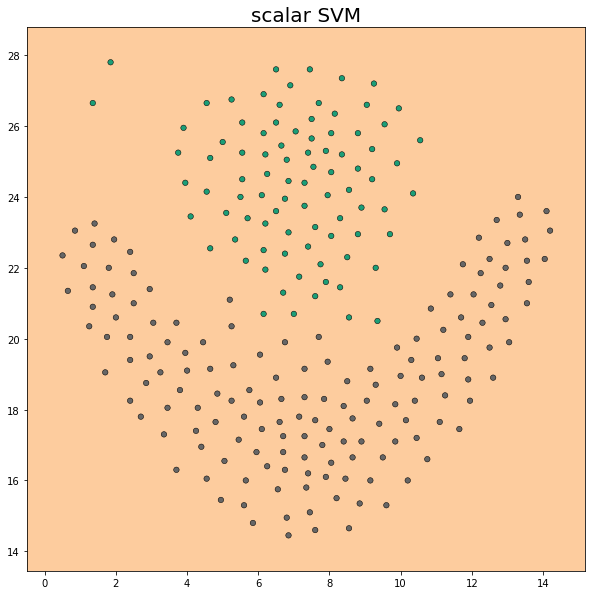

In [136]:
scalar_svm(X_flame, y_flame)

##### Jump

In [ ]:
scalar_svm(X_jump, y_jump)

### b) Kernel gaussowski typu RBF (ang. Radial Basis Function):
$K(x, x') = \exp(-\frac{||x-x'||}{2 \sigma^2})$

#### Wstępne obserwacje

Narysujmy wykresy dla domyślnych parametrów klasyfikatora SVM

In [139]:
def rbf_svm(X, y, sigma=1):
    svm, acc = train_svm(X, y, 'rbf', gamma=1/(2*sigma**2))
    print(f'sigma={sigma}, accuracy={acc * 100:.2f}')
    plt.figure(figsize=(10, 10))
    plt.title(f'{svm.kernel} SVM (sigma={sigma})', fontsize=20)
    plot_svm(svm, X, y)

##### Flame

sigma=1, accuracy=100.00


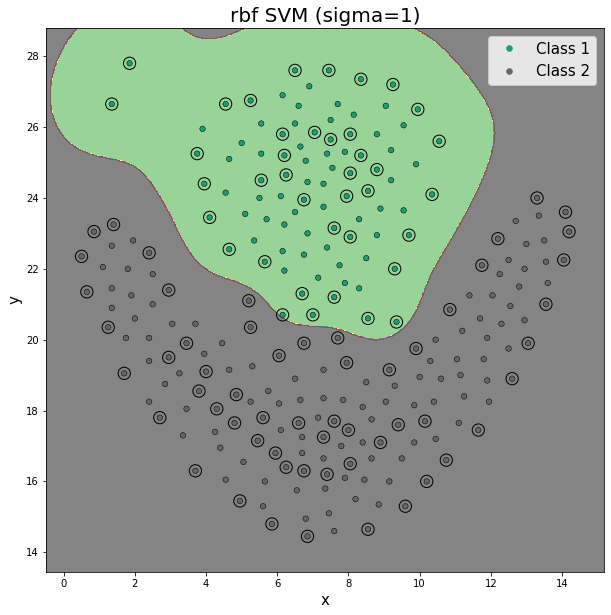

In [140]:
rbf_svm(X_flame, y_flame)

##### Jain

sigma=1, accuracy=100.00


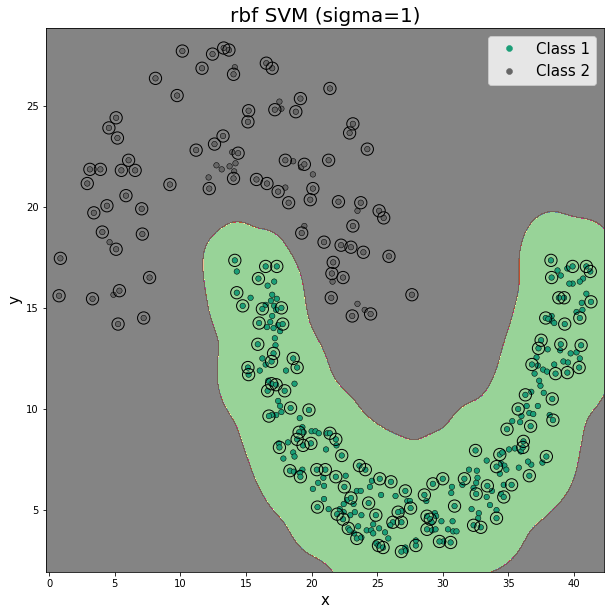

In [141]:
rbf_svm(X_jain, y_jain)

#### Analiza dla różnych wartości parametru $\sigma$

In [143]:
import math

def compare_rbf_svm(X, y, sigma, grid_columns, fig_size):
  fig, axs = plt.subplots(math.ceil(len(sigma) / grid_columns), grid_columns, figsize=fig_size)

  for i, s in enumerate(sigma):
    svm, acc = train_svm(X, y, 'rbf', gamma=1/(2*s**2))
    print(f'sigma={s}, accuracy={acc * 100:.2f}')
    ax = axs[i // grid_columns, i % grid_columns]
    plot_svm(svm, X, y, ax=ax)
    ax.set_title(f'{svm.kernel} SVM (sigma={s})', fontsize=20)

##### Flame

sigma=0.25, accuracy=70.83
sigma=0.5, accuracy=97.92
sigma=0.75, accuracy=100.00
sigma=1, accuracy=100.00
sigma=1.25, accuracy=97.92
sigma=1.5, accuracy=95.83
sigma=1.75, accuracy=97.92
sigma=2, accuracy=97.92
sigma=5, accuracy=97.92


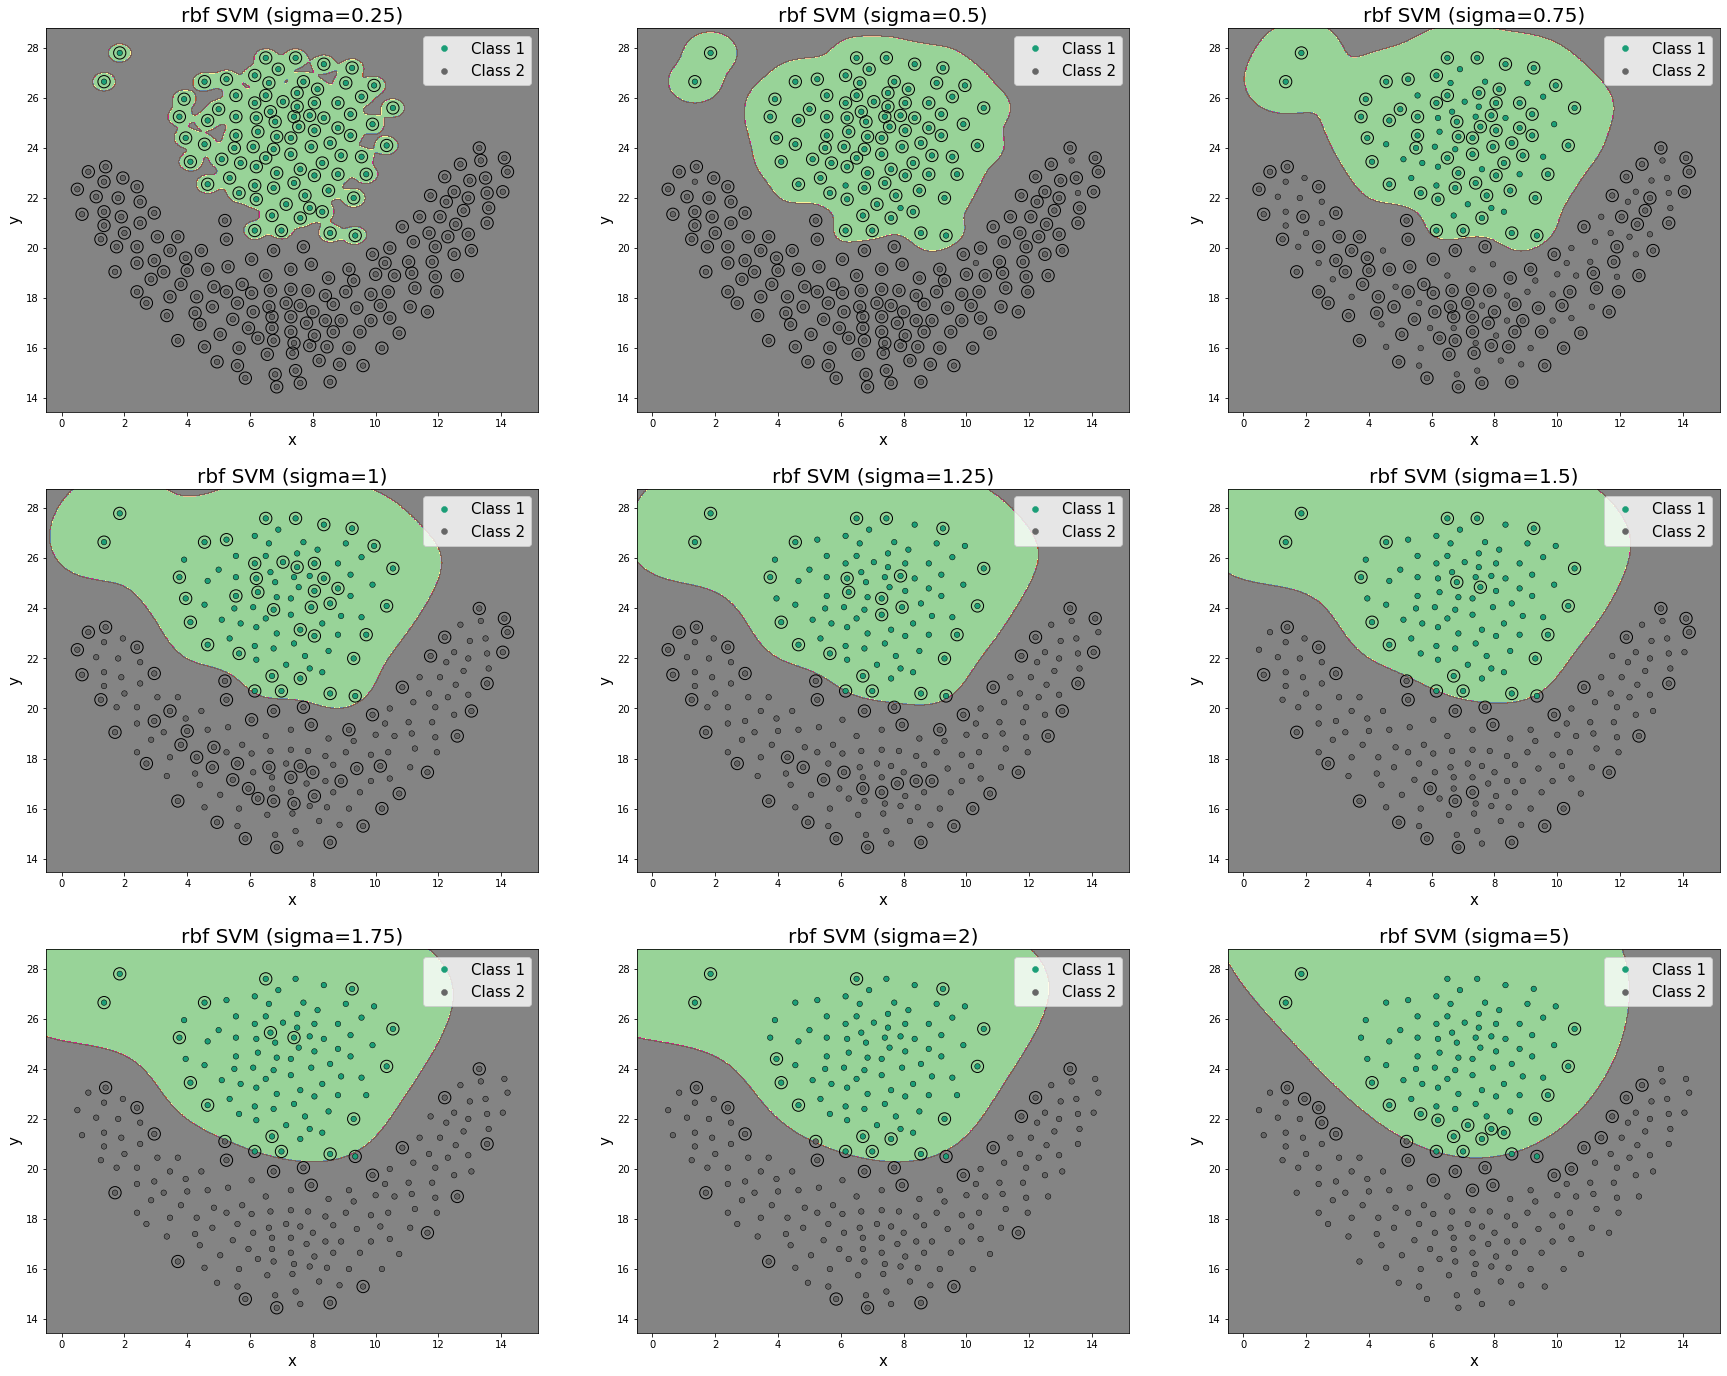

In [144]:
compare_rbf_svm(X_flame, y_flame, [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 5], 3, (30, 24))

##### Jain

sigma=0.25, accuracy=69.33
sigma=0.5, accuracy=94.67
sigma=0.75, accuracy=97.33
sigma=1, accuracy=100.00
sigma=1.25, accuracy=100.00
sigma=1.5, accuracy=100.00
sigma=1.75, accuracy=100.00
sigma=2, accuracy=100.00
sigma=5, accuracy=100.00


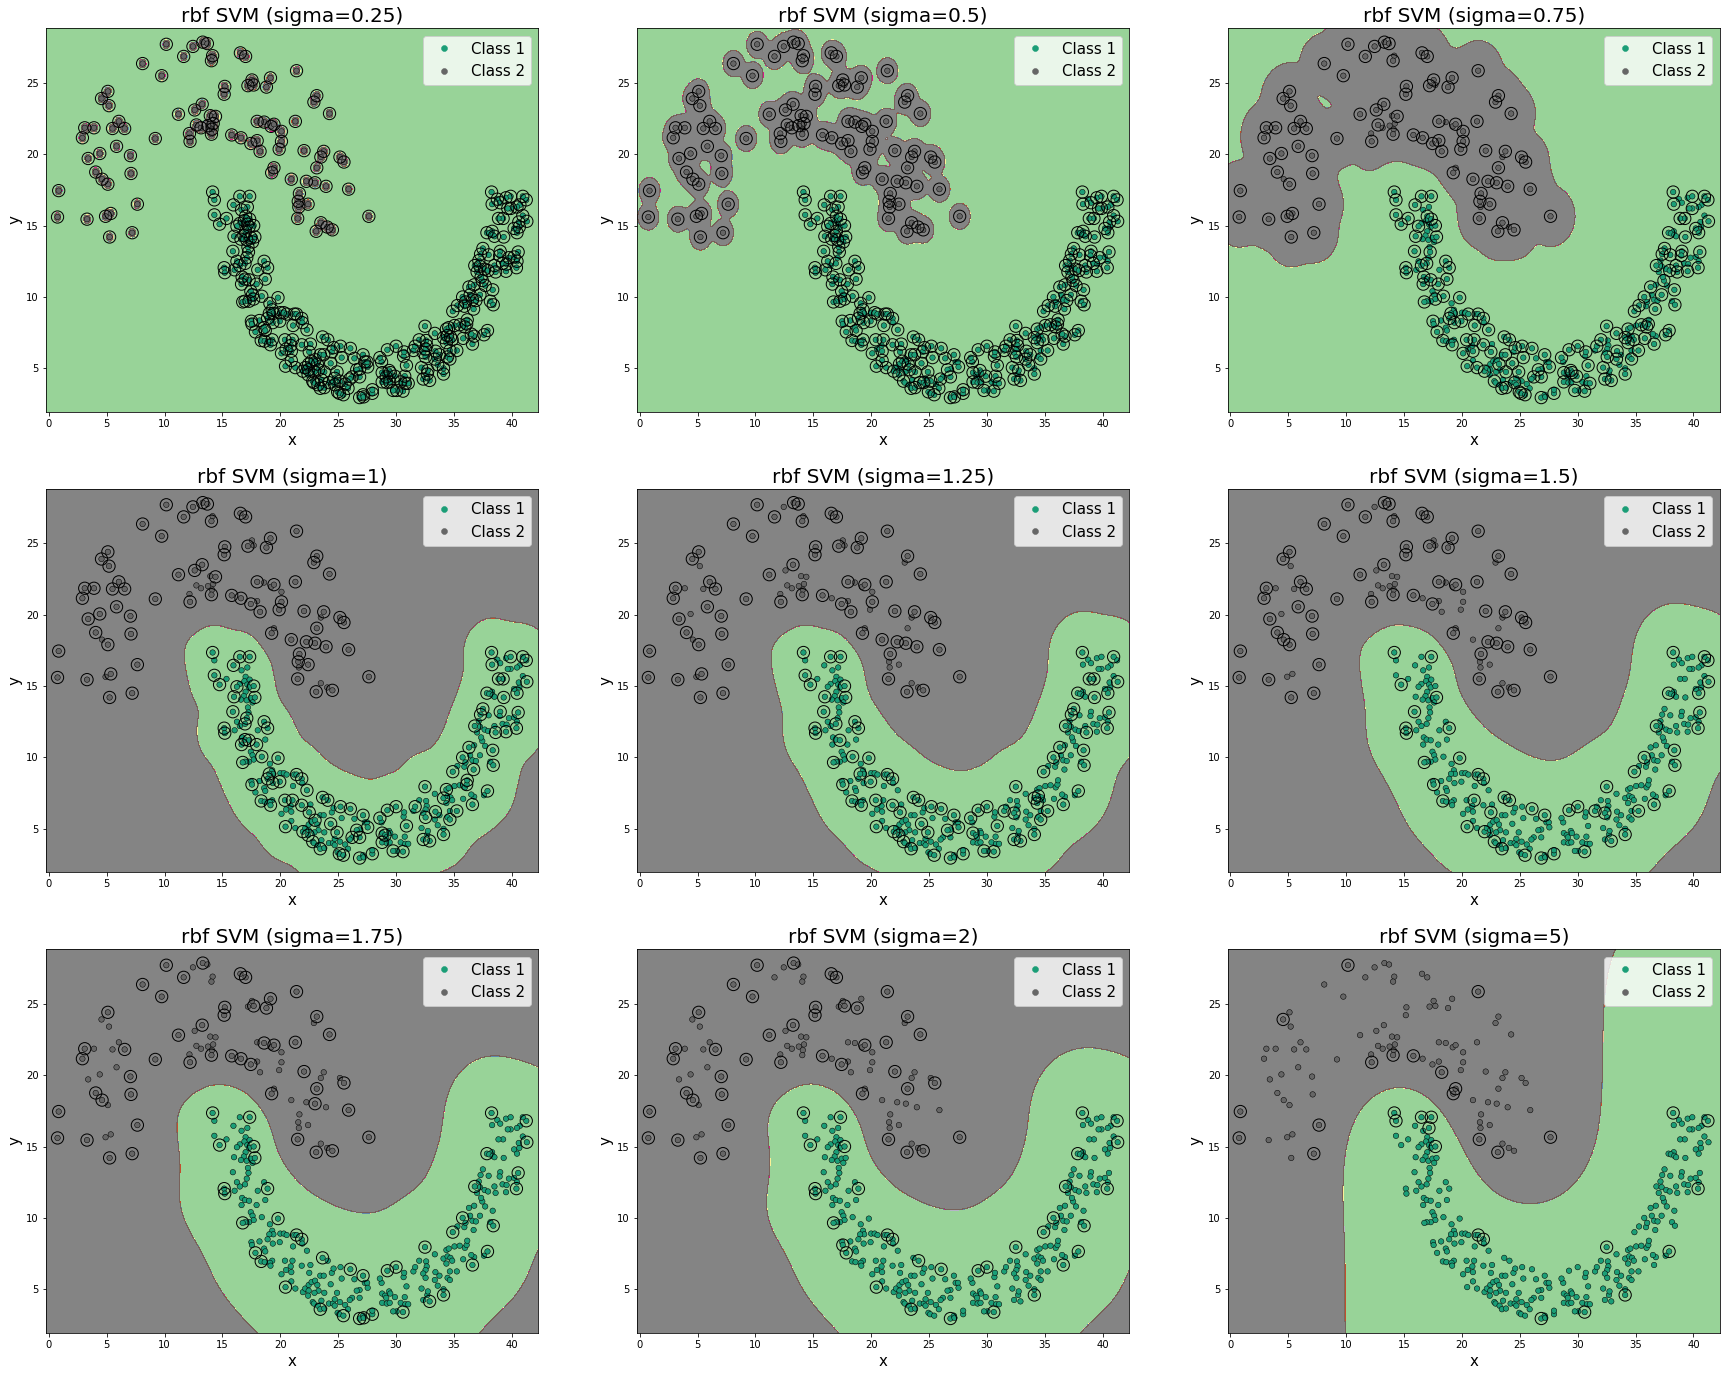

In [145]:
compare_rbf_svm(X_jain, y_jain, [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 5], 3, (30, 24))

### c) Kernel typu skokowego
$$
K(x, y) = 
\begin{cases}
1 \quad\text{dla}\quad ||x − y|| \le R \\
0 \quad\text{dla}\quad ||x − y|| \gt R \\
\end{cases}
$$

#### Definicja kernela

W pierwszej kolejności zdefiniujemy funkcję, którą wykorzystamy jako kernel.

In [146]:
def create_jump_kernel(R):
    def jump_kernel(x, y):
        n_samples_X, n_features_X = x.shape
        n_samples_Y, n_features_Y = y.shape
        K = np.zeros((n_samples_X, n_samples_Y))
        for i in range(n_samples_X):
            for j in range(n_samples_Y):
                distance = np.linalg.norm(x[i] - y[j])
                if distance <= R:
                    K[i,j] = 1
        return K
    
    jump_kernel.__name__ = f'jump_kernel(R={R})'
    return jump_kernel

#### Wstępne obserwacje

In [147]:
def jump_svm(X, y, R=1):
    svm, acc = train_svm(X, y, create_jump_kernel(R))
    print(f'R={r}, accuracy={acc * 100:.2f}')
    plt.figure(figsize=(10, 10))
    plt.title(f'{svm.kernel} SVM (R={R})', size=20)
    plot_svm(svm, X, y)

##### Flame

In [148]:
# jump_svm(X_flame, y_flame)

##### Jain

In [149]:
# jump_svm(X_jain, y_jain)

#### Porównanie dla różnych wartości promienia R

In [150]:
import math

def compare_jump_svm(X, y, R, grid_columns, fig_size):
  fig, axs = plt.subplots(math.ceil(len(R) / grid_columns), grid_columns, figsize=fig_size)

  for i, r in enumerate(R):
    svm, acc = train_svm(X, y, create_jump_kernel(r))
    print(f'R={r}, accuracy={acc * 100:.2f}')
    ax = axs[i // grid_columns, i % grid_columns]
    plot_svm(svm, X, y, ax=ax)
    ax.set_title(f'{svm.kernel} SVM (R={r}, accuracy={acc:.4f})', fontsize=20)

##### Flame

In [151]:
# compare_jump_svm(X_flame, y_flame, [0.25, 0.5, 1, 2, 5, 10], 3, (30, 18))

##### Jain

In [152]:
# compare_jump_svm(X_jain, y_jain, [0.25, 0.5, 1, 2, 5, 10], 3, (30, 18))

### d) Kernel typu funkcja zawiasowa (ang. hinge function)
$$
K(x, y) = 
\begin{cases}
1 − ||x − y||/R \quad\text{dla}\quad ||x − y|| \le R \\
0 \quad\quad\quad\quad\quad\quad\quad\text{dla}\quad ||x − y|| \gt R \\
\end{cases}
$$

#### Definicja kernela

In [153]:
def create_hinge_kernel(R):
    def hinge_kernel(x, y):
        n_samples_X, n_features_X = x.shape
        n_samples_Y, n_features_Y = y.shape
        K = np.zeros((n_samples_X, n_samples_Y))
        for i in range(n_samples_X):
            for j in range(n_samples_Y):
                distance = np.linalg.norm(x[i] - y[j])
                if distance <= R:
                    K[i,j] = 1 - distance / R
        return K
    
    hinge_kernel.__name__ = f'hinge_kernel(R={R})'
    return hinge_kernel

#### Wstępne obserwacje

In [157]:
def hinge_svm(X, y, R=1):
    svm, acc = train_svm(X, y, create_hinge_kernel(R))
    print(f'R={R}, accuracy={acc * 100:.2f}')
    plt.figure(figsize=(10, 10))
    plt.title(f'hinge SVM (R={R})', size=20)
    plot_svm(svm, X, y)

##### Flame

In [158]:
hinge_svm(X_flame, y_flame)

R=1, accuracy=89.58


##### Jain

In [ ]:
hinge_svm(X_jain, y_jain)